In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('dataset_Disney_clean_all.csv') 

In [10]:
df.head()

,Unnamed: 0,date,attraction,minute,SACTMIN,SPOSTMIN
0,0,2015-01-01,7_dwarfs_train,0,0.0,0.0
1,1,2015-01-01,7_dwarfs_train,30,0.0,0.0
2,2,2015-01-01,7_dwarfs_train,60,0.0,0.0
3,3,2015-01-01,7_dwarfs_train,90,0.0,0.0
4,4,2015-01-01,7_dwarfs_train,120,0.0,0.0


In [4]:
df_7dwarfs = df[df['attraction'] == '7_dwarfs_train']

In [12]:
df_7dwarfs.head()

,Unnamed: 0,date,attraction,minute,SACTMIN,SPOSTMIN
0,0,2015-01-01,7_dwarfs_train,0,0.0,0.0
1,1,2015-01-01,7_dwarfs_train,30,0.0,0.0
2,2,2015-01-01,7_dwarfs_train,60,0.0,0.0
3,3,2015-01-01,7_dwarfs_train,90,0.0,0.0
4,4,2015-01-01,7_dwarfs_train,120,0.0,0.0


In [13]:
df_7dwarfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128370 entries, 0 to 4262994
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  128370 non-null  int64  
 1   date        128370 non-null  object 
 2   attraction  128370 non-null  object 
 3   minute      128370 non-null  int64  
 4   SACTMIN     128370 non-null  float64
 5   SPOSTMIN    128370 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 6.9+ MB


C:\Users\isabe\AppData\Local\Temp\ipykernel_17200\590855152.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7dwarfs['date'] = pd.to_datetime(df['date'])


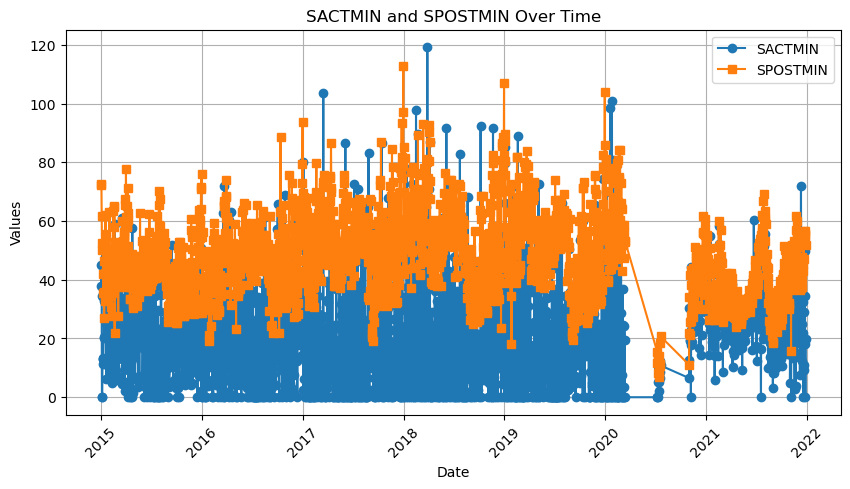

In [5]:
# Convert 'date' column to datetime if it's not already
df_7dwarfs['date'] = pd.to_datetime(df['date'])

# Group by date and aggregate (e.g., mean, sum, etc.)
grouped_df = df_7dwarfs.groupby('date')[['SACTMIN', 'SPOSTMIN']].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(grouped_df.index, grouped_df['SACTMIN'], label='SACTMIN', marker='o')
plt.plot(grouped_df.index, grouped_df['SPOSTMIN'], label='SPOSTMIN', marker='s')

# Formatting
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('SACTMIN and SPOSTMIN Over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.grid(True)

plt.show()

In [18]:
df_7dwarfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128370 entries, 0 to 4262994
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  128370 non-null  int64         
 1   date        128370 non-null  datetime64[ns]
 2   attraction  128370 non-null  object        
 3   minute      128370 non-null  int64         
 4   SACTMIN     128370 non-null  float64       
 5   SPOSTMIN    128370 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 6.9+ MB


In [6]:
df_7dwarfs_no_covid = df_7dwarfs[df_7dwarfs['date'].dt.year != 2020]

In [7]:
df_7dwarfs_ml = df_7dwarfs_no_covid.drop(columns=['date'])

In [8]:
df_7dwarfs_ml.describe()

,Unnamed: 0,minute,SACTMIN,SPOSTMIN
count,1.202300e+05,120230.000000,120230.000000,120230.000000
mean,1.953986e+06,810.000000,20.994511,47.736048
std,1.230490e+06,476.237217,27.438905,43.052365
min,0.000000e+00,0.000000,0.000000,0.000000
25%,8.957572e+05,390.000000,0.000000,0.000000
50%,1.846597e+06,810.000000,10.000000,45.000000
75%,2.923277e+06,1230.000000,35.000000,80.000000
max,4.262994e+06,1620.000000,215.000000,300.000000


In [9]:
# mean SPOSTMIN - mean SACTMIN
mean_diff = df['SPOSTMIN'].mean() - df['SACTMIN'].mean()
print(mean_diff)

10.100244673629764


In [10]:

X = df_7dwarfs_ml.drop(columns=['SACTMIN', 'attraction', 'Unnamed: 0'])  # Features
y = df_7dwarfs_ml['SACTMIN']  # Target variable (numeric)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


In [35]:
X


,minute,SPOSTMIN
0,0,0.0
1,30,0.0
2,60,0.0
3,90,0.0
4,120,0.0
...,...,...
4262990,1500,35.0
4262991,1530,35.0
4262992,1560,35.0
4262993,1590,35.0


In [36]:
model = RandomForestRegressor(n_estimators=50, max_samples=0.5, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=0.5, n_estimators=50, n_jobs=-1,
                      random_state=42)

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error

print(f'MAE: {mae:.4f}')
print(f'RMSE: {rmse:.4f}')

MAE: 14.8450
RMSE: 23.3742


Met een gemiddelde waarde van SACTMIN van 20 minuten, is een MAE van 14.8 en een RMSE van 23.3 heel slecht. Het model is hopeloos overfit op al die ruis.

Mogelijke oplossingen: eerst alle nullen eruithalen.
Dan moving average gebruiken over 7 dagen bijvoorbeeld. Op zowel posted als actual.
Dan weer model proberen trainen. 

In [12]:
df_7dwarfs_nozeros = df_7dwarfs_ml[df_7dwarfs_ml['SPOSTMIN'] != 0]

In [13]:
df_7dwarfs_nozeros.head()

,Unnamed: 0,attraction,minute,SACTMIN,SPOSTMIN
16,16,7_dwarfs_train,480,0.0,55.0
17,17,7_dwarfs_train,510,55.0,75.0
18,18,7_dwarfs_train,540,55.0,105.0
19,19,7_dwarfs_train,570,55.0,120.0
20,20,7_dwarfs_train,600,55.0,85.0


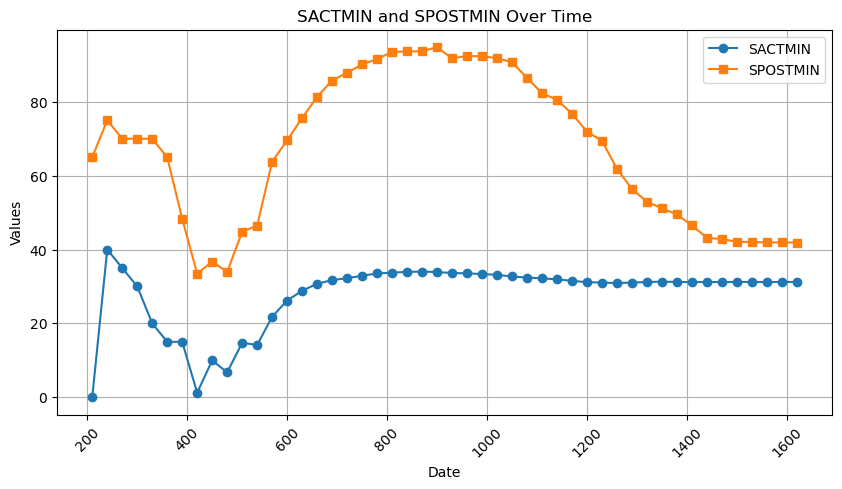

In [ ]:
# Group by date and aggregate (e.g., mean, sum, etc.)
grouped_df = df_7dwarfs_nozeros.groupby('minute')[['SACTMIN', 'SPOSTMIN']].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(grouped_df.index, grouped_df['SACTMIN'], label='SACTMIN', marker='o')
plt.plot(grouped_df.index, grouped_df['SPOSTMIN'], label='SPOSTMIN', marker='s')

# Formatting
plt.xlabel('Minute')
plt.ylabel('Values')
plt.title('SACTMIN and SPOSTMIN Over Time')
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.grid(True)

plt.show()